In [6]:
# Import libraries
import matplotlib.style
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
#matplotlib.style.available
matplotlib.style.use('seaborn-v0_8-bright')


In [7]:
# Define path name
folder_path = "XRAY_files/XRAY_Map_new/"

# Create file name
def filename_map(folder, type, z, x, y):
    """ Create file name for mapping

    Args:
        folder (str): The folder path
        type (str): Either mean or variance
        z (int): The height of the X-Ray source, 5, 75, 10
        x (int): The x position
        y (int): The y position

    Returns:
        filepath : string containing the system path
    """
    return folder+f"Frame_{type}_{z}cm_x{x}_y{y}.csv"

In [8]:
# Test the function
test_z = 5
test_x = 0
test_y = 17

test_path = filename_map(folder_path, "mean", test_z, test_x, test_y)
print(test_path)

XRAY_files/XRAY_Map_new/Frame_mean_5cm_x0_y17.csv


In [10]:
# Try retrieving data
test_array = np.loadtxt(test_path, delimiter=',')
#print(test_array)

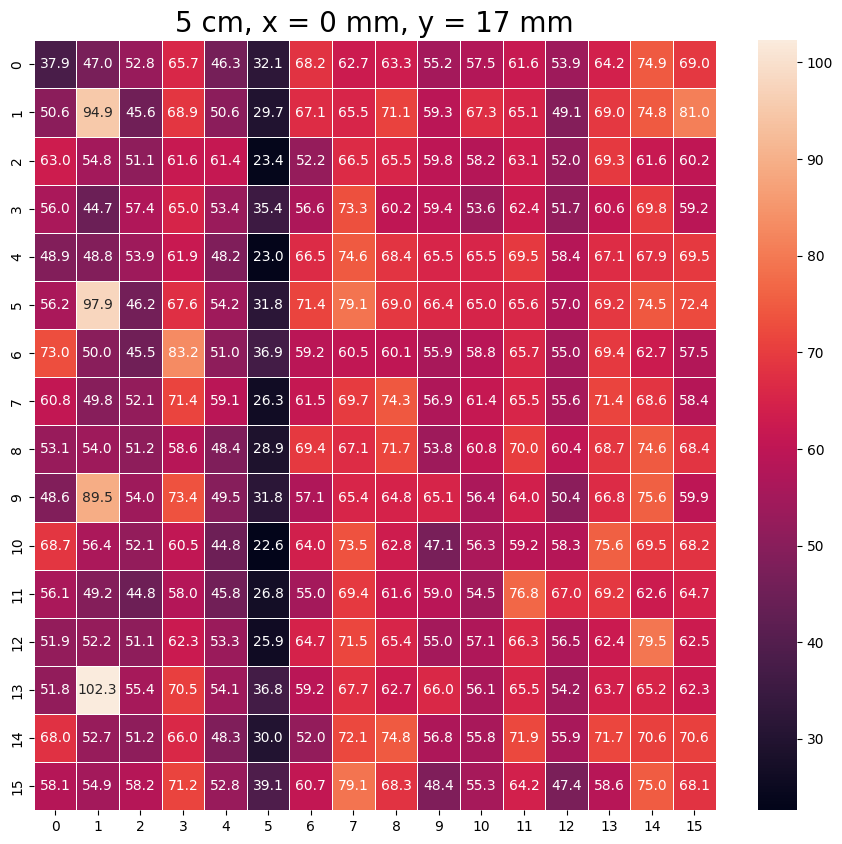

In [12]:
# Test matplotlib plotting, this is for the pixel values
Fig, ax = plt.subplots(1,1, figsize = (11,10))
ax = sns.heatmap(test_array, annot=True, linewidths=.5, fmt = ".1f")
ax.set_title(f"{test_z} cm, x = {test_x} mm, y = {test_y} mm", fontsize = 20)
plt.show()

In [39]:
# Create a function for the mapping
def mapping(folder, z, xrange, yrange):
    """Create heatmap based on position. If the file can't be found, it'll give 0 instead.

    Args:
        folder (str): folder path
        z (int): the height of the xray source, 5, 75, or 10
        xrange (tuple): tuple containing (xmin, xmax)
        yrange (tuple): tuple containing (ymin, ymax)
    """
    
    X = np.arange(xrange[0], xrange[1]+2, 2)
    Y = np.arange(yrange[0], yrange[1]+2, 2)
    XYmean = np.zeros((len(X), len(Y)))
    XYvar = np.zeros((len(X), len(Y)))
    for j, x in enumerate(X):
        for i, y in enumerate(Y):
            path_mean = filename_map(folder, "mean", z, x, y)
            path_var = filename_map(folder, "var", z, x, y)
            immean = np.loadtxt(path_mean, delimiter=',')
            imvar = np.loadtxt(path_var, delimiter=',')
            total_mean = np.sum(immean)/256
            total_var = np.sum(imvar)/256
            
            try:
                XYmean[i,j] = total_mean
                XYvar[i,j] = total_var
            except:
                XYmean[i,j] = 0
                XYvar[i,j] = 0
                
    Fig_map, ax_map = plt.subplots(nrows=1, ncols= 2, figsize = (12,6))
    sns.heatmap(XYmean, linewidths=0.5, ax = ax_map[0], annot=True,  fmt = ".2f", xticklabels=X, yticklabels=Y)
    ax_map[0].set_title(f"mean, z={z}cm", fontsize = 12)
    ax_map[0].set_aspect('equal')
    ax_map[0].invert_yaxis()
    sns.heatmap(XYvar, linewidths=0.5, ax = ax_map[1], annot=True,  fmt = ".2f")
    ax_map[1].set_title(f"var, z={z}cm", fontsize = 12)
    ax_map[1].set_aspect('equal')
    ax_map[1].invert_yaxis()
    plt.show()
    
    
    
            
    

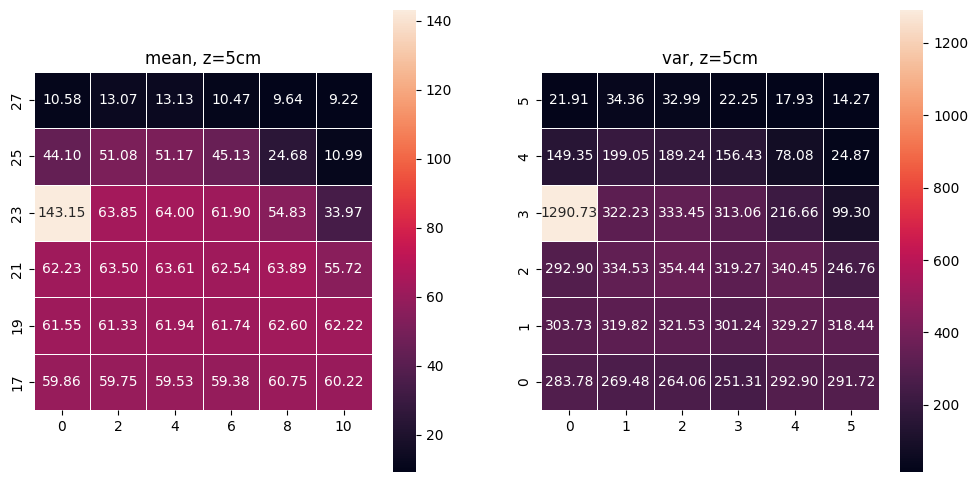

In [38]:
mapping(folder_path, 5, (0,10), (17, 27))

In [ ]:

mapping(folder_path, 10, (0,10), (17, 27))